##LOADING PACKAGES WE WILL USE

In [40]:
#In this cell we are installing and importing some python packages that we will use for our DATA EXPLORATION
#Here we are installing some packages that are not already installed in google colab
!pip install newspaper3k
!pip install flair
!pip install --upgrade "ibm-watson>=4.7.1"

import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
import spacy
from nltk.corpus import stopwords
import pprint

#To download an article from the internet
from newspaper import Article

#To make tables
import pandas as pd

#Importing some packages that are useful for generating Word Clouds
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib




Requirement already up-to-date: ibm-watson>=4.7.1 in /usr/local/lib/python3.6/dist-packages (5.1.0)


In [41]:
#Here we are downloading some English Grammar related data that we use later
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## EXPLORING DATA - A Cursory Look at the Article

In [42]:
vox_article = 'https://www.vox.com/recode/22221173/elon-musk-tesla-foundation-philanthropy-wealthiest-person'
ceo_mag_article = "https://www.theceomagazine.com/business/innovation-technology/worlds-richest-jeff-bezos/"
cnbc_article =  "https://www.cnbc.com/2021/01/07/elon-musk-is-now-the-richest-person-in-the-world-passing-jeff-bezos-.html"

In [43]:
#Here we want to get an article from the internet and examine it more closely. 
#SELECT AN ARTICLE
url = vox_article


article = Article(url)
article.download()
article.html
article.parse()
article.authors

['Theodore Schleifer',
 'Alex Ward',
 'Jen Kirby',
 'Sara Morrison',
 'Dylan Scott',
 'Aaron Rupar',
 'Constance Grady',
 'Jan']

In [44]:
#How big is the article?
len(article.text)


7795

In [45]:
# What are all the pieces of words or punctuations in the text?
tokens = word_tokenize(article.text)
print(tokens)


['The', 'richest', 'person', 'in', 'the', 'world', 'would', 'like', 'your', 'help', 'giving', 'away', 'his', 'billions', 'of', 'dollars', '.', 'One', 'of', 'the', 'first', 'things', 'that', 'Elon', 'Musk', ',', 'the', 'founder', 'and', 'CEO', 'of', 'Tesla', ',', 'did', 'upon', 'climbing', 'to', 'the', 'top', 'of', 'American', 'capitalism', 'last', 'week', 'was', 'to', 'ask', 'for', 'any', 'advice', 'about', 'how', 'to', 'climb', 'the', 'ranks', 'of', 'philanthropy', '.', 'Now', 'that', 'he', 'has', 'more', 'money', 'than', 'anyone', 'else', 'on', 'the', 'planet', ',', 'Musk', 'is', 'likely', 'to', 'come', 'under', 'far', 'greater', 'scrutiny', 'than', 'he', 'ever', 'has', 'about', 'how', 'he', 'gives', 'it', 'away', '—', 'or', 'doesn', '’', 't', '.', 'Amazon', 'founder', 'Jeff', 'Bezos', ',', 'whom', 'Musk', 'displaced', 'from', 'the', 'top', 'ranking', ',', 'drew', 'more', 'and', 'more', 'negative', 'attention', 'for', 'his', 'penny-pinching', 'philanthropy', 'as', 'he', 'became', 'we

In [46]:
#How many unique words and single char words exist
print(len(tokens))
unique = set(tokens)
print('# of Unique tokens',len(unique))
print('# of tokens / len of unique tokens',len(tokens)/len(unique))

1545
# of Unique tokens 572
# of tokens / len of unique tokens 2.7010489510489513


In [47]:
#Lets just look at "tokens" of a certain length
sorted(unique)
single=[w for w in unique if len(w) == 1 ]
print(len(single))
single

22


['w',
 '“',
 '”',
 ';',
 't',
 'I',
 '@',
 's',
 '5',
 'a',
 '6',
 '(',
 '’',
 ')',
 'A',
 '.',
 '—',
 ':',
 '$',
 ',',
 '&',
 '8']

In [48]:
# How long are the words?
fd_wlen = nltk.FreqDist([len(w) for w in unique])
fd_wlen

FreqDist({1: 22,
          2: 33,
          3: 57,
          4: 98,
          5: 78,
          6: 69,
          7: 60,
          8: 51,
          9: 39,
          10: 24,
          11: 17,
          12: 13,
          13: 4,
          14: 3,
          15: 4})

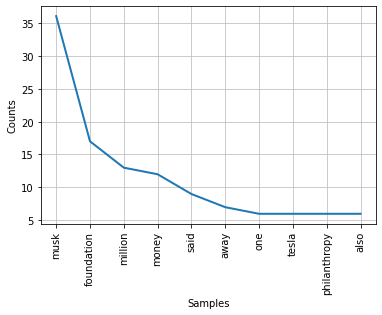

In [49]:
#text preprocessing: remove punctuations
tokens_nop = [ t for t in tokens if t not in string.punctuation + "".join(['’' , '“', '”' , '—']) ]
tokens_nop

# Convert all characters to Lower case
tokens_lower=[ t.lower() for t in tokens_nop ]

# Create a stopword list from the standard list of stopwords available in nltk
stop = stopwords.words('english')

# Remove all these stopwords from the text
tokens_nostop=[ t for t in tokens_lower if t not in stop ]

#remove number like characters 
tokens_nostop = [x for x in tokens_nostop if not any(c.isdigit() for c in x)]

# Frequency distribution of the most common words
%matplotlib inline
tokens.count('')
fd = nltk.FreqDist(tokens_nostop)
fd.most_common(10)
fd.plot(10)

In [50]:
# The snowball stemmer -  which supports 13 non-English languages as well!
snowball = nltk.SnowballStemmer('english')
tokens_snow = [ snowball.stem(t) for t in tokens_nostop ]
print(tokens_snow[:10])

['richest', 'person', 'world', 'would', 'like', 'help', 'give', 'away', 'billion', 'dollar']


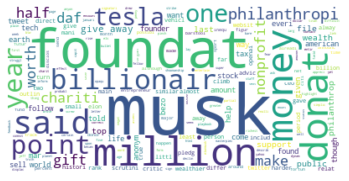

In [51]:
# Let's use Snowball Stemmer's result.
# Further cleaning: filter off anything with less than 3 characters
nltk.FreqDist(tokens_snow).most_common(100)
tokens_clean = [ t for t in tokens_snow if len(t) >= 3 ]
len(tokens_snow)
len(tokens_clean)
nltk.FreqDist(tokens_clean).most_common(50)
fd_clean = nltk.FreqDist(tokens_clean)
text_clean=" ".join(tokens_clean)

wc = WordCloud(background_color="white").generate(text_clean)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

##NAMED ENTITY RECOGNITION - How to Recognize Other Details Mentioned about the Client


In [52]:
#Lets now look at the Grammatical Structure of ONE sentence from the article
nlp = spacy.load("en_core_web_sm")
doc =  nlp("Elon Musk first passed Bezos to claim the title of world’s richest person last Friday, but then dropped to the No. two spot on Monday as Tesla shares fell nearly 8%.")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Elon PROPN compound
Musk PROPN nsubj
first ADV advmod
passed VERB ROOT
Bezos PROPN dobj
to PART aux
claim VERB advcl
the DET det
title NOUN dobj
of ADP prep
world NOUN pobj
’s PART punct
richest ADJ amod
person NOUN appos
last ADJ amod
Friday PROPN npadvmod
, PUNCT punct
but CCONJ cc
then ADV advmod
dropped VERB conj
to ADP prep
the DET det
No NOUN dep
. NOUN nmod
two NUM nummod
spot NOUN pobj
on ADP prep
Monday PROPN pobj
as SCONJ mark
Tesla PROPN compound
shares NOUN nsubj
fell VERB advcl
nearly ADV advmod
8 NUM nummod
% NOUN npadvmod
. PUNCT punct


In [53]:
for ent in doc.ents:
    print(ent.text,"--", ent.label_)

Elon Musk -- PERSON
Bezos -- PERSON
last Friday -- DATE
two -- CARDINAL
Monday -- DATE
Tesla -- ORG
nearly 8% -- PERCENT


##NOUN CHUNK & SVO - Let's Now Extract Some more Information on the Client


In [54]:
sentence_dict = {}
for chunk in doc.noun_chunks:
    sentence_dict[chunk.text] = [chunk.root.text, chunk.root.dep_,chunk.root.head.text]
pd.DataFrame(sentence_dict, index = ["Root", "Dep_", "Head_Text"])

,Elon Musk,Bezos,the title,world,richest person,the No. two spot,Monday,Tesla shares
Root,Musk,Bezos,title,world,person,spot,Monday,shares
Dep_,nsubj,dobj,dobj,pobj,appos,pobj,pobj,nsubj
Head_Text,passed,passed,claim,of,title,to,on,fell


In [55]:
# object and subject constants
OBJECT_DEPS = {"dobj", "dative", "attr", "oprd"}
SUBJECT_DEPS = {"nsubj", "nsubjpass", "csubj", "agent", "expl"}
# tags that define wether the word is wh-
WH_WORDS = {"WP", "WP$", "WRB"}

# extract the subject, object and verb from the input
def extract_svo(doc):
    sub = []
    at = []
    ve = []
    for token in doc:
        # is this a verb?
        if token.pos_ == "VERB":
            ve.append(token.text)
        # is this the object?
        if token.dep_ in OBJECT_DEPS or token.head.dep_ in OBJECT_DEPS:
            at.append(token.text)
        # is this the subject?
        if token.dep_ in SUBJECT_DEPS or token.head.dep_ in SUBJECT_DEPS:
            sub.append(token.text)
    return " ".join(sub).strip().lower(), " ".join(ve).strip().lower(), " ".join(at).strip().lower()

def is_question(doc):
    # is the first token a verb?
    if len(doc) > 0 and doc[0].pos_ == "VERB":
        return True, ""
    # go over all words
    for token in doc:
        # is it a wh- word?
        if token.tag_ in WH_WORDS:
            return True, token.text.lower()
    return False, ""

In [56]:
subject_words, verb_words, object_words = extract_svo(doc)

In [57]:
subject_words

'elon musk tesla shares'

In [58]:
verb_words

'passed claim dropped fell'

In [59]:
object_words

'bezos the title of ’s person'

##SENTIMENT ANALYSIS


In [60]:
#Lets now check if the sentence we selected has a "positive" or "negative" sentiment


from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(doc.text)
classifier.predict(sentence)

print("\n", doc.text, "\n")

print('The sentence is:', sentence.labels)




2021-01-20 12:07:05,916 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt

 Elon Musk first passed Bezos to claim the title of world’s richest person last Friday, but then dropped to the No. two spot on Monday as Tesla shares fell nearly 8%. 

The sentence is: [NEGATIVE (0.9995)]


In [61]:
#To get more information other than just positive or negative, we can use a full-flegged tone analysis API from IBM

from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('ElQoBZw54M3T7MguJWppYjUj2DN9uYyiomhpCaa4pkB0')
version = '2021-01-18'
tone_analyzer = ToneAnalyzerV3(
    version=version,
    authenticator=authenticator
)

tone_analyzer.set_service_url('https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/133fb2cc-0314-48b9-b027-c4965e15bd56')


result = tone_analyzer.tone(
    doc.text,
    content_type='text/plain;charset=utf-8', 
    content_language = 'en'
).get_result()

print(doc.text, "\n")

pp =pprint.PrettyPrinter(indent = 4)
pp.pprint(result)

Elon Musk first passed Bezos to claim the title of world’s richest person last Friday, but then dropped to the No. two spot on Monday as Tesla shares fell nearly 8%. 

{   'document_tone': {   'tones': [   {   'score': 0.567827,
                                          'tone_id': 'sadness',
                                          'tone_name': 'Sadness'}]}}


In [62]:
#Lets now look at the range of tones used in the entire article.

result = tone_analyzer.tone(
    article.text,
    content_type='text/plain;charset=utf-8', 
    content_language = 'en'
).get_result()

pp.pprint(result)

{   'document_tone': {   'tones': [   {   'score': 0.604453,
                                          'tone_id': 'joy',
                                          'tone_name': 'Joy'},
                                      {   'score': 0.574646,
                                          'tone_id': 'sadness',
                                          'tone_name': 'Sadness'},
                                      {   'score': 0.558428,
                                          'tone_id': 'tentative',
                                          'tone_name': 'Tentative'},
                                      {   'score': 0.652251,
                                          'tone_id': 'analytical',
                                          'tone_name': 'Analytical'}]},
    'sentences_tone': [   {   'sentence_id': 0,
                              'text': 'The richest person in the world would '
                                      'like your help giving away his billions '
                    